# Constrain fit parameters to a range of reasonable values
So far we have looked at allowing the top and bottom to either be free parameters or fixed values, and let the slope of the curve be fit as a free parameter.

But in some cases, you may want to not let these be entirely free parameters, but also not fix them---but rather constrain them to a reasonable range. For instance, maybe constraining the top to be between 0.75 and 1.
Likewise, sometimes you can end up with the slope being fit to an extremely steep or shallow value, so it can also be useful to constrain the slope.

Note that when constraining these parameters, especially the slope, you need to make sure you are choosing a reasonable range.
For the slope, what is a reasonable range will depend on the units used for concentration, as well as inherent properties of the serum or antibody in question.

To constrain these parameters, you can use the *fixtop*, *fixbottom*, and *fixslope* parameters to `HillCurve` or `CurveFits`.
Each of these can be:
 - `False`: fit as a free parameter
 - A single number: value is constrained to this number
 - A 2-tuple giving the min max range (eg, `(0.8, 1)`), in which case the value is constrained to this range.

Here is an example.

First, import Python modules:

In [1]:
import matplotlib.pyplot as plt

import neutcurve

import pandas as pd

Now we read some example data and fit it with the top and the slope either free (eg, `fixtop=False`) or constrained to a range (eg, `fixtop=(0.8, 1.0)`).
The curves are then plotted for each type of fitting:

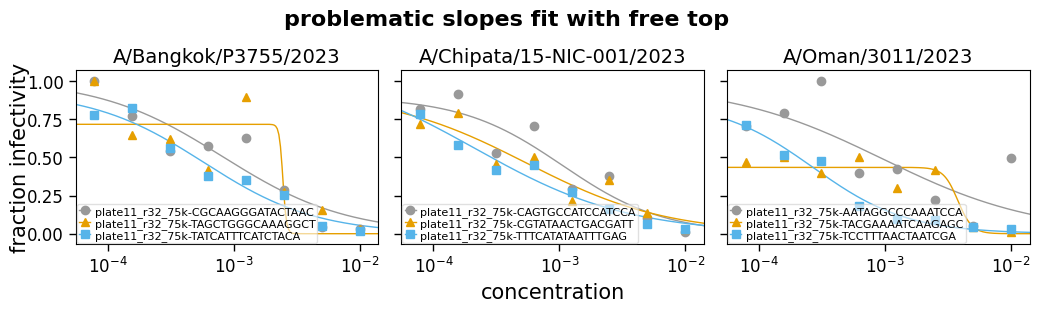

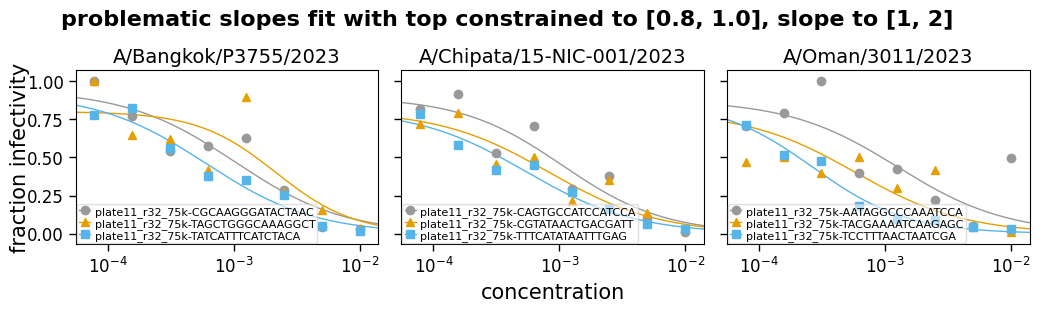

/home/jbloom/neutcurve/neutcurve/hillcurve.py:1157: RuntimeWarning: invalid value encountered in power
  return b + (t - b) / (1 + (c / m) ** s)
/home/jbloom/neutcurve/neutcurve/hillcurve.py:1157: RuntimeWarning: divide by zero encountered in divide
  return b + (t - b) / (1 + (c / m) ** s)


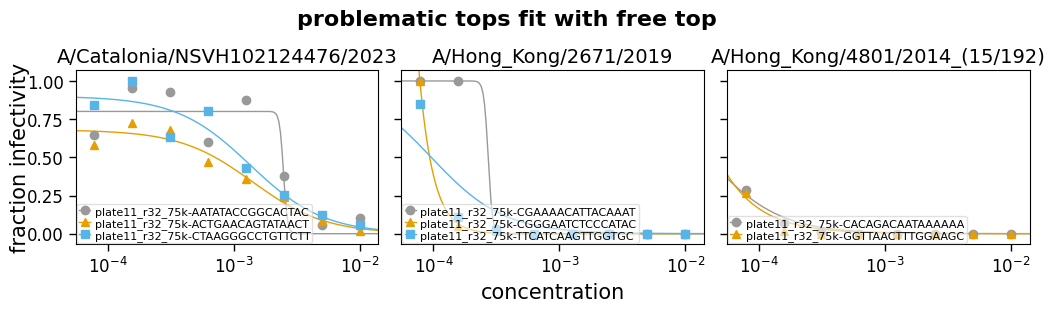

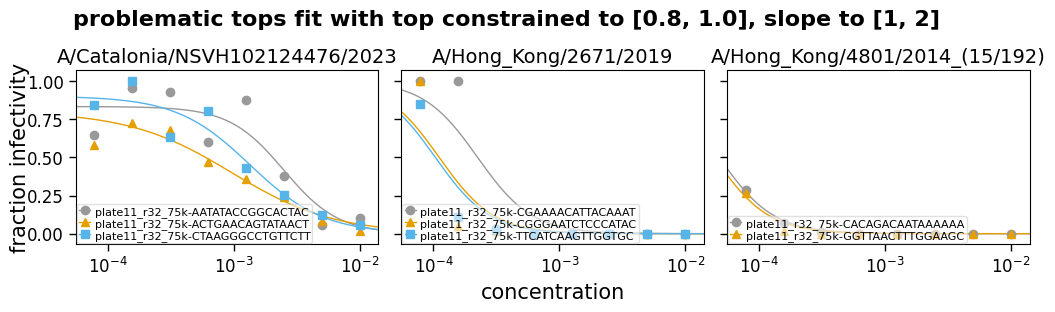

In [2]:
# NBVAL_IGNORE_OUTPUT

data = pd.read_csv("constrain_params_range_data.csv")

fit_params = []

for group, group_data in data.groupby("serum"):
    for desc, fixtop, fixslope in [
        ("free top", False, False),
        ("top constrained to [0.8, 1.0], slope to [1, 2]", (0.8, 1), (1, 2)),
    ]:
        fits = neutcurve.CurveFits(group_data, fixtop=fixtop, fixslope=fixslope)

        fig, _ = fits.plotReplicates(
            sera=[group],
            attempt_shared_legend=False,
            legendfontsize=8,
            heightscale=1.1,
            widthscale=1.1,
            subplot_titles="{virus}",
        )
        _ = fig.suptitle(
            f"{group} fit with {desc}",
            y=0.95,
            fontsize=16,
            fontweight="bold",
        )
        fig.tight_layout()
        display(fig)
        plt.close(fig)

        if desc != "free top":
            fit_params.append(
                fits.fitParams(average_only=False, no_average=True)
                .assign(fit_method=desc)
                .drop(columns=["nreplicates", "ic50_str", "midpoint_bound"])
            )
    print("\n\n")

fit_params = pd.concat(fit_params, ignore_index=True)
fit_params = fit_params[
    ["fit_method"] + [c for c in fit_params.columns if c != "fit_method"]
]
if fit_params["fit_method"].nunique() == 1:
    fit_params = fit_params.drop(columns="fit_method")

Tabulate the actual fit parameters for each setting:

In [3]:
for serum_group, df in fit_params.groupby("serum"):
    print(f"\nFit params for {serum_group}")
    display(
        df.drop(columns="serum").map(
            lambda x: f"{x:.2g}" if isinstance(x, float) else x
        )
    )


Fit params for problematic slopes


,virus,replicate,ic50,ic50_bound,midpoint,midpoint_bound_type,slope,top,bottom,r2
0,A/Bangkok/P3755/2023,plate11_r32_75k-CGCAAGGGATACTAAC,0.0009,interpolated,0.001,interpolated,1,0.94,0,0.86
1,A/Bangkok/P3755/2023,plate11_r32_75k-TAGCTGGGCAAAGGCT,0.0015,interpolated,0.0022,interpolated,1.4,0.8,0,0.67
2,A/Bangkok/P3755/2023,plate11_r32_75k-TATCATTTCATCTACA,0.00051,interpolated,0.0006,interpolated,1,0.92,0,0.95
3,A/Chipata/15-NIC-001/2023,plate11_r32_75k-CAGTGCCATCCATCCA,0.00085,interpolated,0.0011,interpolated,1.1,0.9,0,0.87
4,A/Chipata/15-NIC-001/2023,plate11_r32_75k-CGTATAACTGACGATT,0.0005,interpolated,0.00082,interpolated,1,0.81,0,0.87
5,A/Chipata/15-NIC-001/2023,plate11_r32_75k-TTTCATATAATTTGAG,0.00034,interpolated,0.00054,interpolated,1,0.82,0,0.95
6,A/Oman/3011/2023,plate11_r32_75k-AATAGGCCCAAATCCA,0.00094,interpolated,0.0013,interpolated,1,0.87,0,0.52
7,A/Oman/3011/2023,plate11_r32_75k-TACGAAAATCAAGAGC,0.00035,interpolated,0.00059,interpolated,1,0.8,0,0.35
8,A/Oman/3011/2023,plate11_r32_75k-TCCTTTAACTAATCGA,0.00021,interpolated,0.00027,interpolated,1.2,0.87,0,0.97



Fit params for problematic tops


,virus,replicate,ic50,ic50_bound,midpoint,midpoint_bound_type,slope,top,bottom,r2
9,A/Catalonia/NSVH102124476/2023,plate11_r32_75k-AATATACCGGCACTAC,0.002,interpolated,0.0025,interpolated,2,0.83,0,0.83
10,A/Catalonia/NSVH102124476/2023,plate11_r32_75k-ACTGAACAGTATAACT,0.0006,interpolated,0.00097,interpolated,1.1,0.8,0,0.93
11,A/Catalonia/NSVH102124476/2023,plate11_r32_75k-CTAAGGGCCTGTTCTT,0.0012,interpolated,0.0014,interpolated,1.5,0.9,0,0.92
12,A/Hong_Kong/2671/2019,plate11_r32_75k-CGAAAACATTACAAAT,0.00022,interpolated,0.00022,interpolated,2,1,0,0.85
13,A/Hong_Kong/2671/2019,plate11_r32_75k-CGGGAATCTCCCATAC,0.00011,interpolated,0.00011,interpolated,2,1,0,0.77
14,A/Hong_Kong/2671/2019,plate11_r32_75k-TTCATCAAGTTGGTGC,0.0001,interpolated,0.0001,interpolated,2,1,0,0.85
15,A/Hong_Kong/4801/2014_(15/192),plate11_r32_75k-CACAGACAATAAAAAA,7.8e-05,upper,4.8e-05,upper,2,1,0,0.99
16,A/Hong_Kong/4801/2014_(15/192),plate11_r32_75k-GGTTAACTTTGGAAGC,7.8e-05,upper,4.4e-05,upper,2,1,0,0.93
